# PROBLEM STATEMENT


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/0/04/Enlisted_Housing%2C_Fort_Belvior.jpg"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. House Price Predictions
  </td></tr>
</table>






---

* Dataset includes house sale prices for King County in USA. 
* Homes that are sold in the time period: May, 2014 and May, 2015.
* Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction
* Columns:

> 1. ida: notation for a house
2. date: Date house was sold
3. price: Price is prediction target
4. bedrooms: Number of Bedrooms/House
5. bathrooms: Number of bathrooms/House
6. sqft_living: square footage of the home
7. sqft_lot: square footage of the lot
8. floors: Total floors (levels) in house
9. waterfront: House which has a view to a waterfront
10. view: Has been viewed
11. condition: How good the condition is ( Overall )
12. grade: overall grade given to the housing unit, based on King County grading system
13. sqft_abovesquare: footage of house apart from basement
14. sqft_basement: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. sqft_living15: Living room area in 2015(implies-- some renovations) 
21. sqft_lot15: lotSize area in 2015(implies-- some renovations)




---








# STEP #0: IMPORT LIBRARIES

In [ ]:
!pip install tensorflow-gpu==2.0.0.alpha0
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASETS

In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# You have to include the full link to the csv file containing your dataset
house_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kc_house_data.csv', encoding = 'ISO-8859-1')


In [ ]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
house_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house_df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


# STEP #2: VISUALIZE DATASET

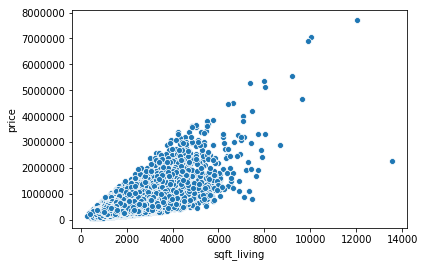

In [ ]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df)

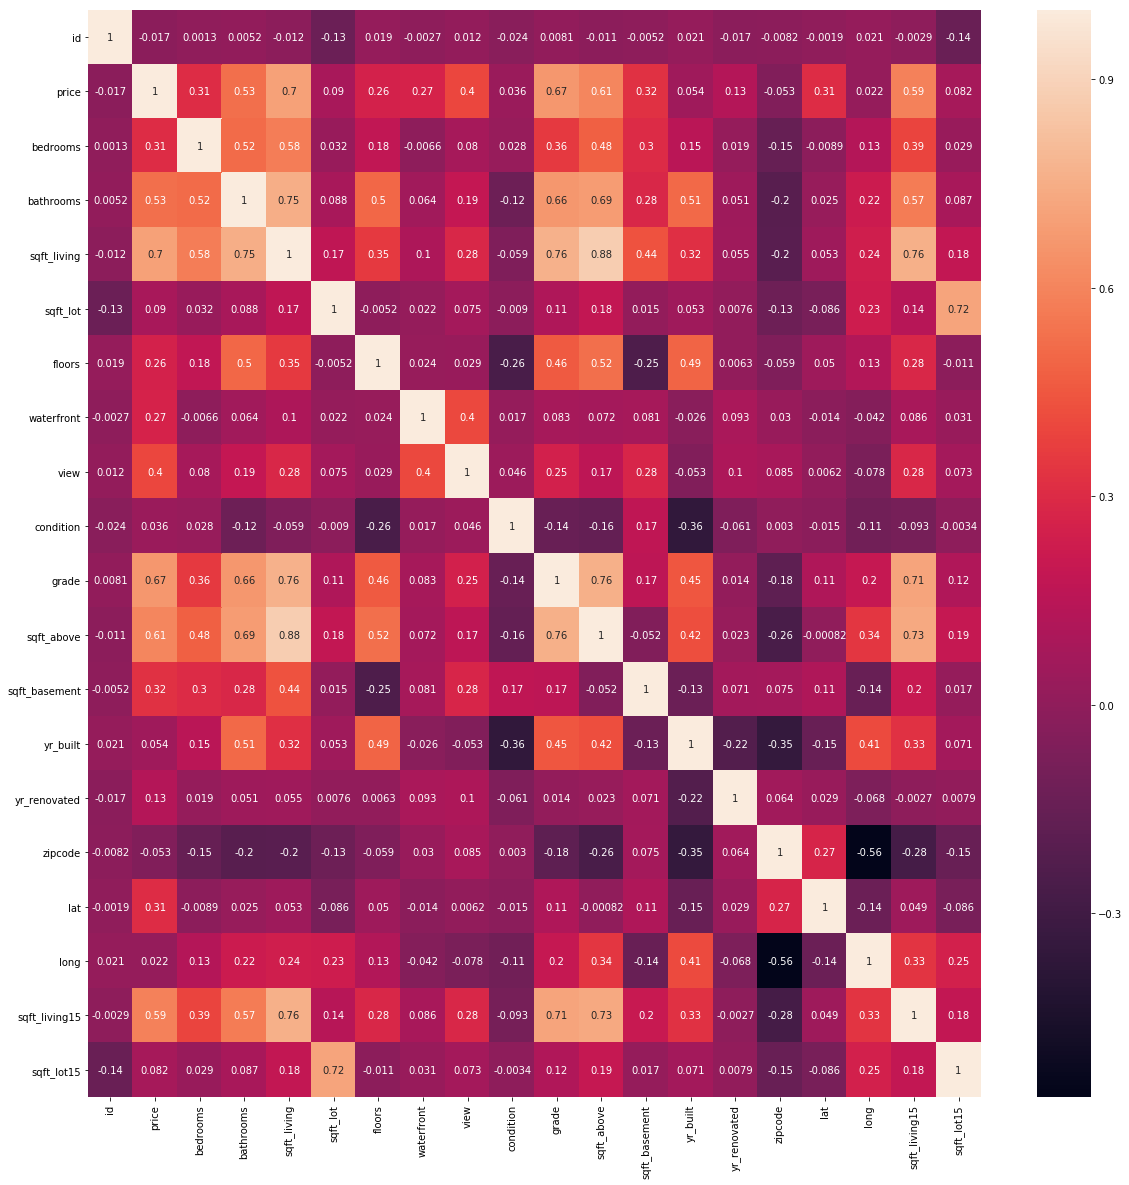

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_df.corr(), annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcbc18bcc0>,
      dtype=object)

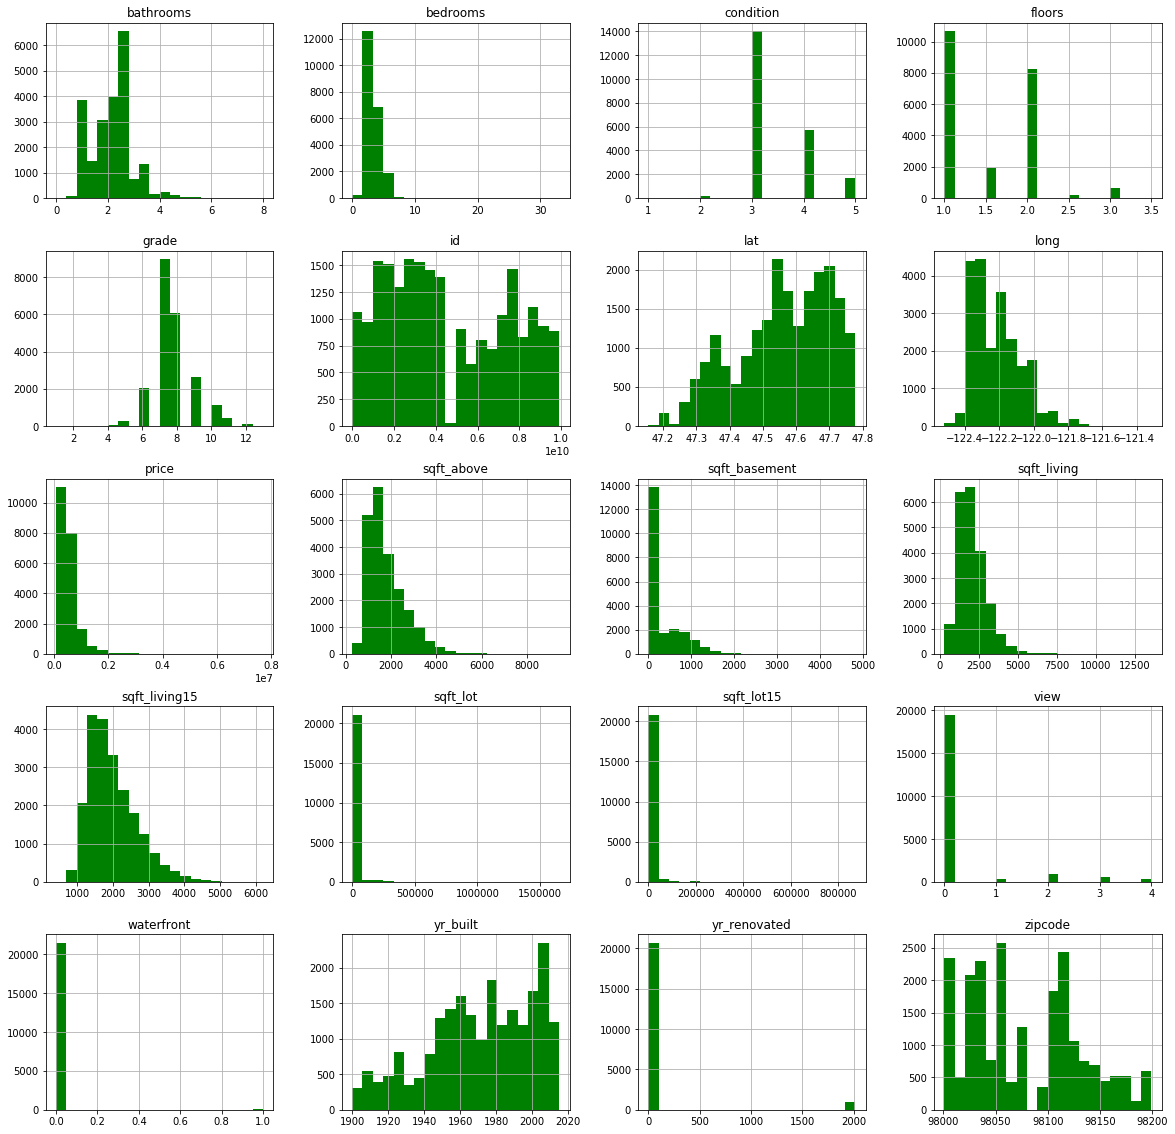

In [ ]:
house_df.hist(bins = 20, figsize = (20,20), color = 'g')

In [ ]:
sns.pairplot(house_df)

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [ ]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [ ]:
X = house_df[selected_features]

In [ ]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0
5,4,4.50,5420,101930,1.0,3890,1530
6,3,2.25,1715,6819,2.0,1715,0
7,3,1.50,1060,9711,1.0,1060,0
8,3,1.00,1780,7470,1.0,1050,730
9,3,2.50,1890,6560,2.0,1890,0


In [ ]:
y = house_df['price']

In [ ]:
y

0         221900.0
1         538000.0
2         180000.0
3         604000.0
4         510000.0
5        1225000.0
6         257500.0
7         291850.0
8         229500.0
9         323000.0
10        662500.0
11        468000.0
12        310000.0
13        400000.0
14        530000.0
15        650000.0
16        395000.0
17        485000.0
18        189000.0
19        230000.0
20        385000.0
21       2000000.0
22        285000.0
23        252700.0
24        329000.0
25        233000.0
26        937000.0
27        667000.0
28        438000.0
29        719000.0
           ...    
21583     399950.0
21584     380000.0
21585     270000.0
21586     505000.0
21587     385000.0
21588     414500.0
21589     347500.0
21590    1222500.0
21591     572000.0
21592     475000.0
21593    1088000.0
21594     350000.0
21595     520000.0
21596     679950.0
21597    1575000.0
21598     541800.0
21599     810000.0
21600    1537000.0
21601     467000.0
21602     224000.0
21603     507250.0
21604     42

In [ ]:
X.shape

(21613, 7)

In [ ]:
y.shape

(21613,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [ ]:
X_scaled.shape

(21613, 7)

In [ ]:
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [ ]:
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
y_scaled = scaler.fit_transform(y)

In [ ]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

# STEP#4: TRAINING THE MODEL

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [ ]:
X_train.shape

(16209, 7)

In [ ]:
X_test.shape

(5404, 7)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(7, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Train on 12967 samples, validate on 3242 samples
Epoch 1/100
12967/12967 [==============================] - 1s 75us/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 2/100
12967/12967 [==============================] - 1s 57us/sample - loss: 0.0011 - val_loss: 0.0010
Epoch 3/100
12967/12967 [==============================] - 1s 55us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
12967/12967 [==============================] - 1s 55us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 5/100
12967/12967 [==============================] - 1s 57us/sample - loss: 0.0010 - val_loss: 0.0011
Epoch 6/100
12967/12967 [==============================] - 1s 60us/sample - loss: 0.0010 - val_loss: 0.0011
Epoch 7/100
12967/12967 [==============================] - 1s 56us/sample - loss: 0.0010 - val_loss: 0.0011
Epoch 8/100
12967/12967 [==============================] - 1s 58us/sample - loss: 0.0010 - val_loss: 0.0011
Epoch 9/100
12967/12967 [==============================] - 1s 56us/sample - loss: 0.001

# STEP#5: EVALUATING THE MODEL 

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

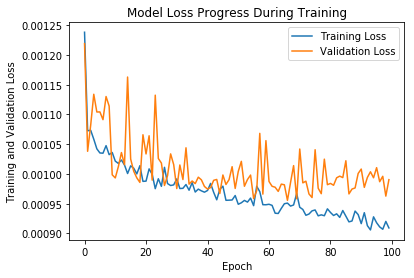

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

array([[227310.61]], dtype=float32)

Text(0, 0.5, 'True Values')

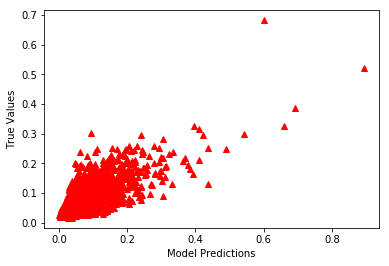

In [ ]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [ ]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


(0, 3000000)

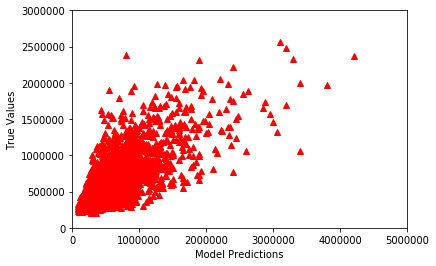

In [ ]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [ ]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [ ]:


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 237328.895 
MSE = 56325004260.07512 
MAE = 158060.02626815785 
R2 = 0.5782390929145498 
Adjusted R2 = 0.5776919605295241


# LET'S INCREASE THE NUMBER OF FEATURES (INDEPENDANT VARIABLES) AND RETRAIN THE EXACT SAME MODEL

In [ ]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
y = house_df['price']

In [ ]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(19, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))


In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Train on 12967 samples, validate on 3242 samples
Epoch 1/100
12967/12967 [==============================] - 1s 70us/sample - loss: 8.3040e-04 - val_loss: 4.6965e-04
Epoch 2/100
12967/12967 [==============================] - 1s 56us/sample - loss: 5.5353e-04 - val_loss: 4.6055e-04
Epoch 3/100
12967/12967 [==============================] - 1s 55us/sample - loss: 4.8789e-04 - val_loss: 3.8756e-04
Epoch 4/100
12967/12967 [==============================] - 1s 57us/sample - loss: 4.3302e-04 - val_loss: 3.8204e-04
Epoch 5/100
12967/12967 [==============================] - 1s 57us/sample - loss: 3.9601e-04 - val_loss: 4.1388e-04
Epoch 6/100
12967/12967 [==============================] - 1s 56us/sample - loss: 3.9076e-04 - val_loss: 4.1527e-04
Epoch 7/100
12967/12967 [==============================] - 1s 56us/sample - loss: 3.8415e-04 - val_loss: 3.3765e-04
Epoch 8/100
12967/12967 [==============================] - 1s 57us/sample - loss: 3.8342e-04 - val_loss: 3.0879e-04
Epoch 9/100
12967/12967

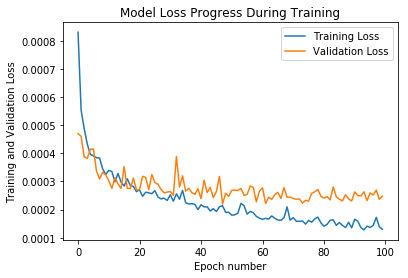

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

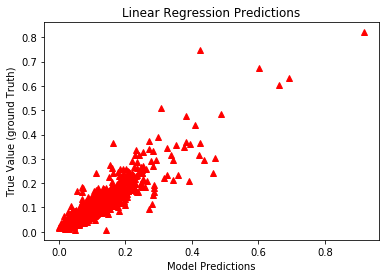

In [ ]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [ ]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 131826.563 
MSE = 17378242752.714054 
MAE = 74925.59477354737 
R2 = 0.8735534389066262 
Adjusted R2 = 0.8733894051913457


# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS